In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    449 non-null    datetime64[ns]
 1   cases   449 non-null    int64         
 2   deaths  449 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 10.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22399 entries, 0 to 22398
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        22399 non-null  datetime64[ns]
 1   state       22399 non-null  object        
 2   fips        22399 non-null  int64         
 3   cases       22399 non-null  int64         
 4   deaths      22399 non-null  int64         
 5   population  21226 non-null  float64       
 6   cases_pct   21226 non-null  float64       
 7   deaths_pct  21226 non-null  float64       
dtypes: datetime64[ns](1), flo

<AxesSubplot:xlabel='date'>

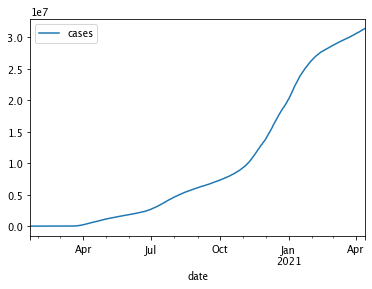

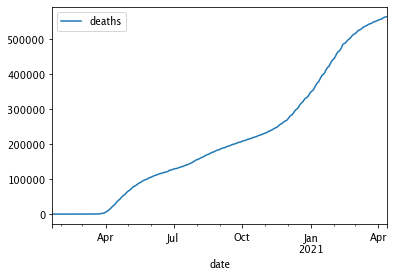

In [90]:
# processed infection in the US time-series(by date)
# calculate average

#https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv
#https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

infection_us = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
infection_by_state = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
infection_us['date'] = pd.to_datetime(infection_us['date'], format='%Y-%m-%d', errors='raise')
infection_by_state['date'] = pd.to_datetime(infection_by_state['date'], format='%Y-%m-%d', errors='raise')
#population_us = pd.read_csv('')
population_by_state = pd.read_csv('./population_by_state.csv')[['GEO_NAME', 'B01001_001E']]
population_by_state = population_by_state.rename(columns={'GEO_NAME': 'state',
                                                          'B01001_001E': 'population'})
infection_by_state = pd.merge(infection_by_state, population_by_state, how="left", on=["state"])

#infection_us = infection_us.reindex(columns = ['date'])
#infection_by_state = infection_us.reindex(columns = ['date', 'state'])

infection_by_state.eval('cases_pct = cases / population', inplace=True)
infection_by_state.eval('deaths_pct = deaths / population', inplace=True)

infection_us.info()
infection_by_state.info()
infection_us.plot(x='date', y='cases')
infection_us.plot(x='date', y='deaths')

<AxesSubplot:xlabel='date', ylabel='cases_pct'>

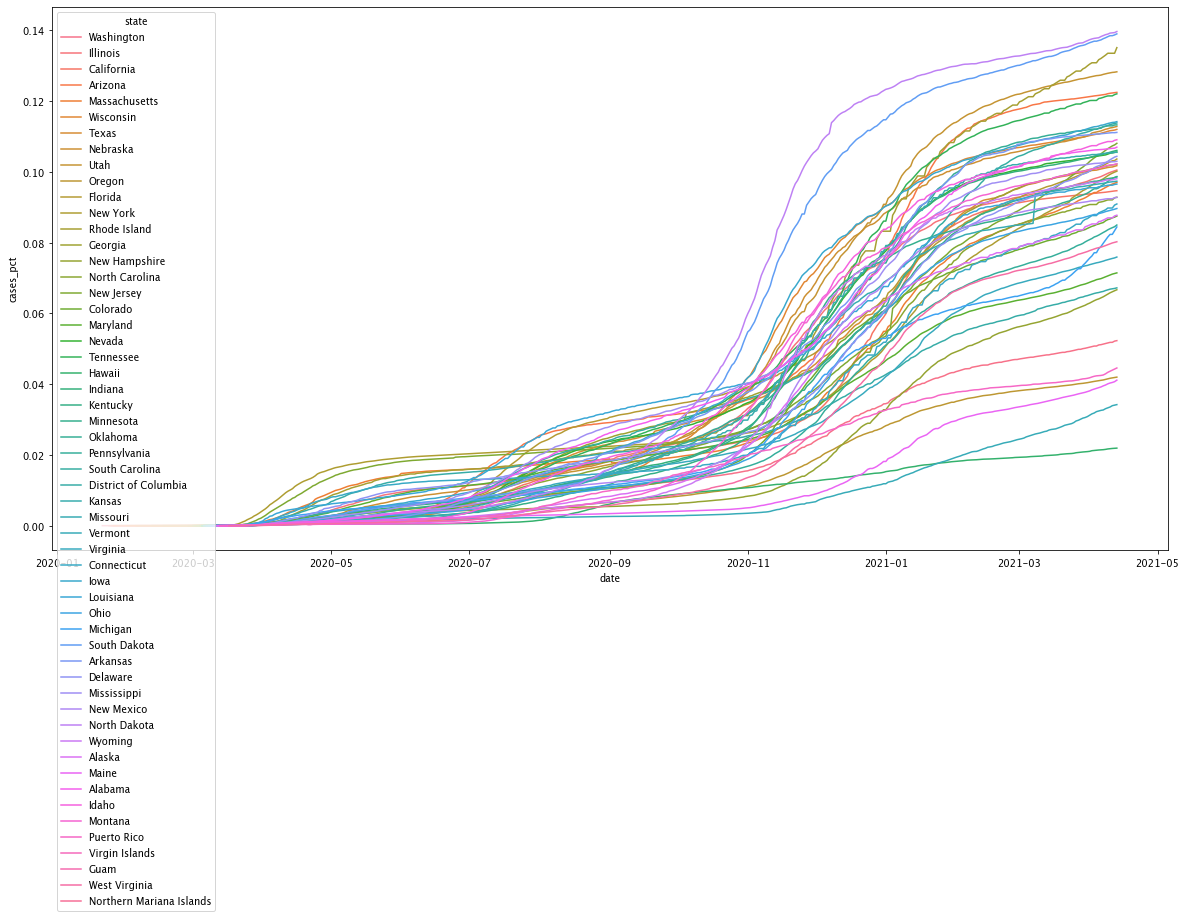

In [91]:
# average infection by state time-series(by date)
# variation or standard deviation by state compared to the averge of whole US

plt.figure(figsize=(20,10))
sns.lineplot(data = infection_by_state, x='date', y='cases_pct', hue='state')

<AxesSubplot:xlabel='date', ylabel='cases_pct'>

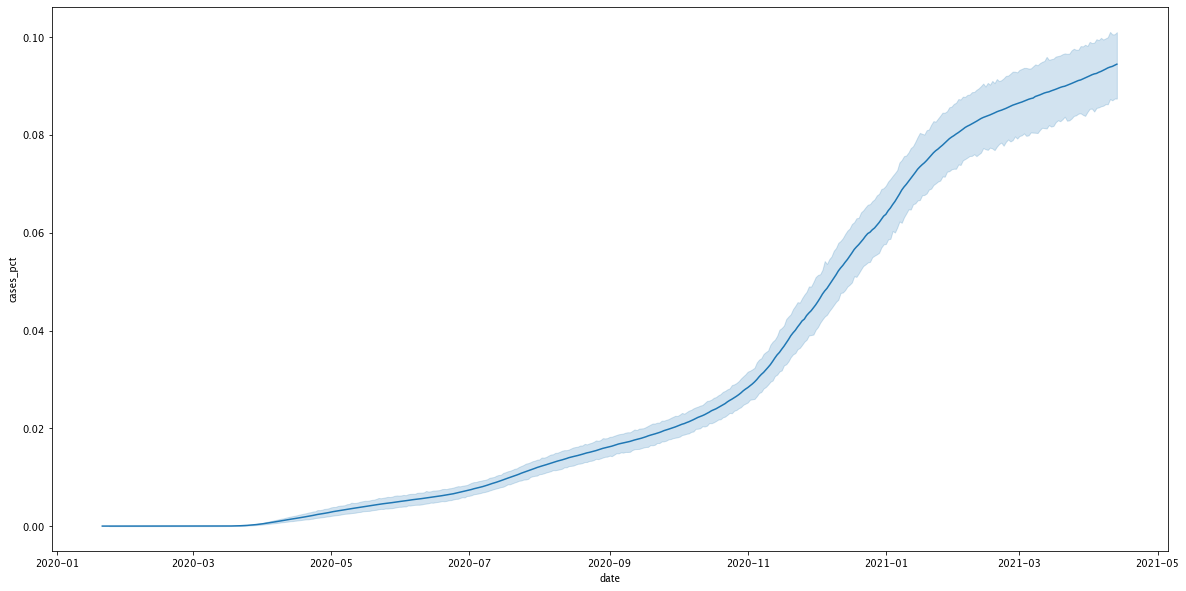

In [92]:
plt.figure(figsize=(20,10))
sns.lineplot(data = infection_by_state, x='date', y='cases_pct')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22848 entries, 0 to 448
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        22848 non-null  datetime64[ns]
 1   state       22399 non-null  object        
 2   fips        22399 non-null  float64       
 3   cases       22848 non-null  int64         
 4   deaths      22848 non-null  int64         
 5   population  21226 non-null  float64       
 6   cases_pct   21226 non-null  float64       
 7   deaths_pct  21226 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='date', ylabel='cases'>

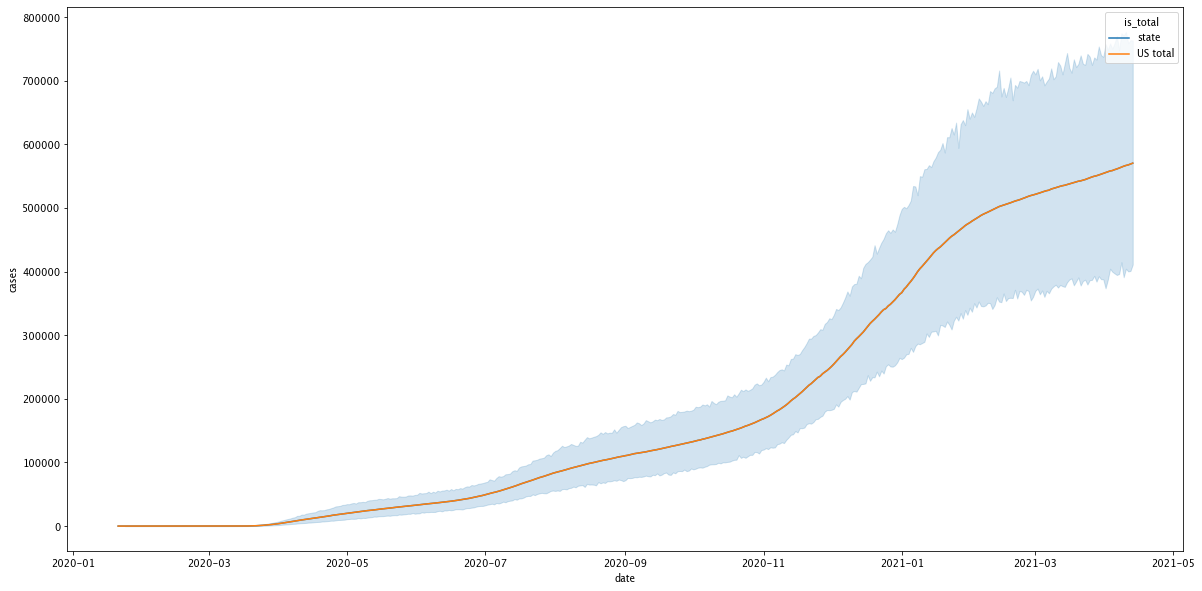

In [93]:
# variance
# compare us total: state, us_total 

infection_us_avg = pd.DataFrame(infection_us)
for i, row in infection_us_avg.iterrows():
    infection_us_avg.at[i, 'cases'] = row['cases']/55
    infection_us_avg.at[i, 'deaths'] = row['deaths']/55
_agg = infection_by_state.append(infection_us_avg)
_agg.info()
_agg.head()
_agg['is_total'] = np.where(_agg['state'] != _agg['state'], 'US total', 'state')
plt.figure(figsize=(20,10))

sns.lineplot(data=_agg, x="date", y="cases", hue="is_total")

<AxesSubplot:xlabel='date', ylabel='deaths'>

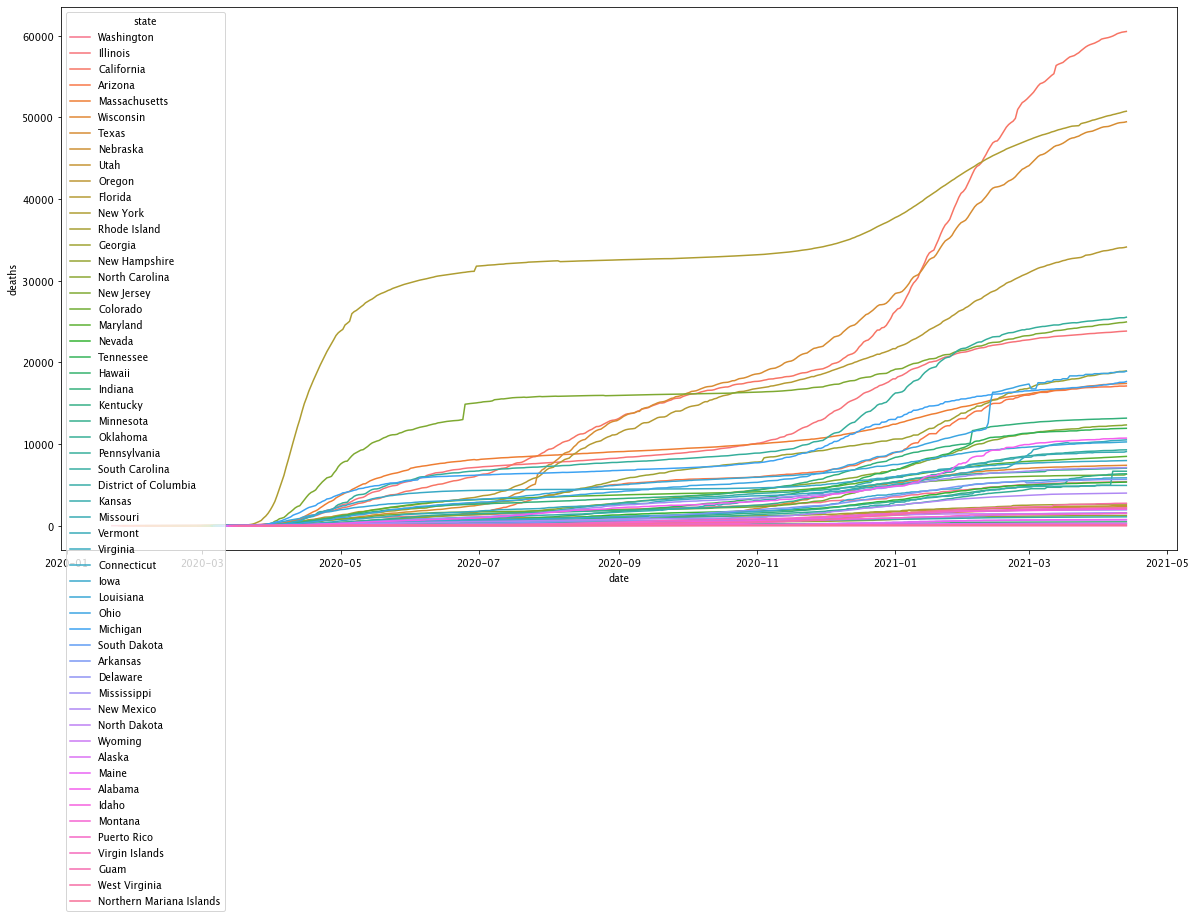

In [94]:
plt.figure(figsize=(20,10))
sns.lineplot(data = infection_by_state, x='date', y='deaths', hue='state')


<AxesSubplot:xlabel='date', ylabel='deaths'>

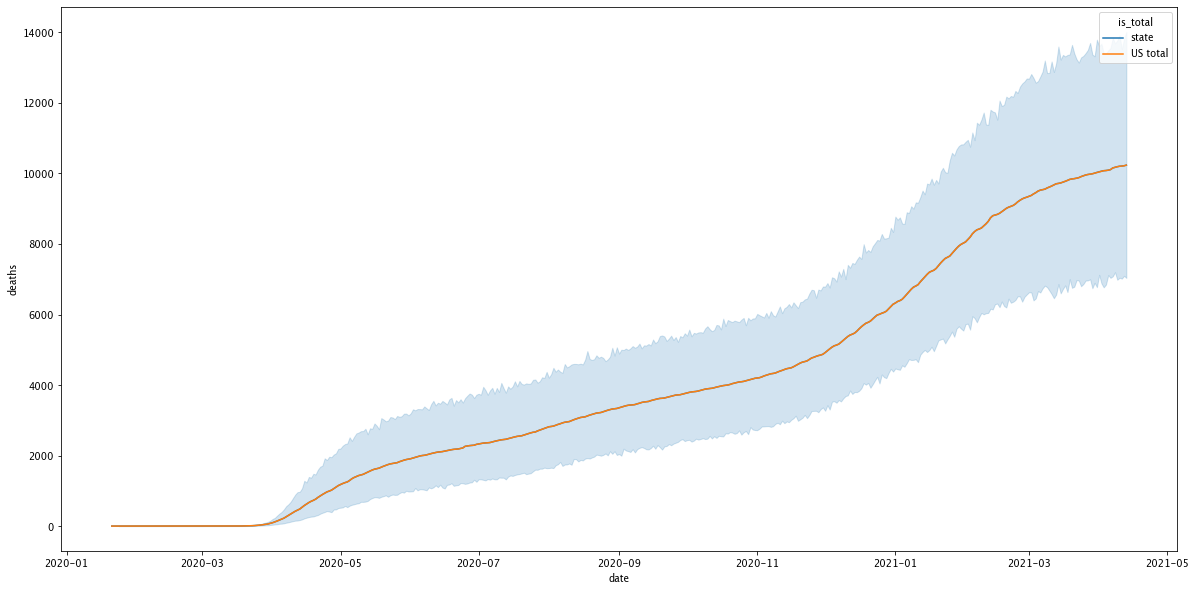

In [95]:
plt.figure(figsize=(20,10))
sns.lineplot(data=_agg, x="date", y="deaths", hue="is_total")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219084 entries, 0 to 1219083
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   date        1219084 non-null  datetime64[ns]
 1   county      1219084 non-null  object        
 2   state       1219084 non-null  object        
 3   fips        1207925 non-null  float64       
 4   cases       1219084 non-null  int64         
 5   deaths      1192289 non-null  float64       
 6   county_tmp  24273 non-null    object        
 7   population  24273 non-null    float64       
 8   cases_pct   24273 non-null    float64       
 9   deaths_pct  24273 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 102.3+ MB


<AxesSubplot:xlabel='date', ylabel='cases'>

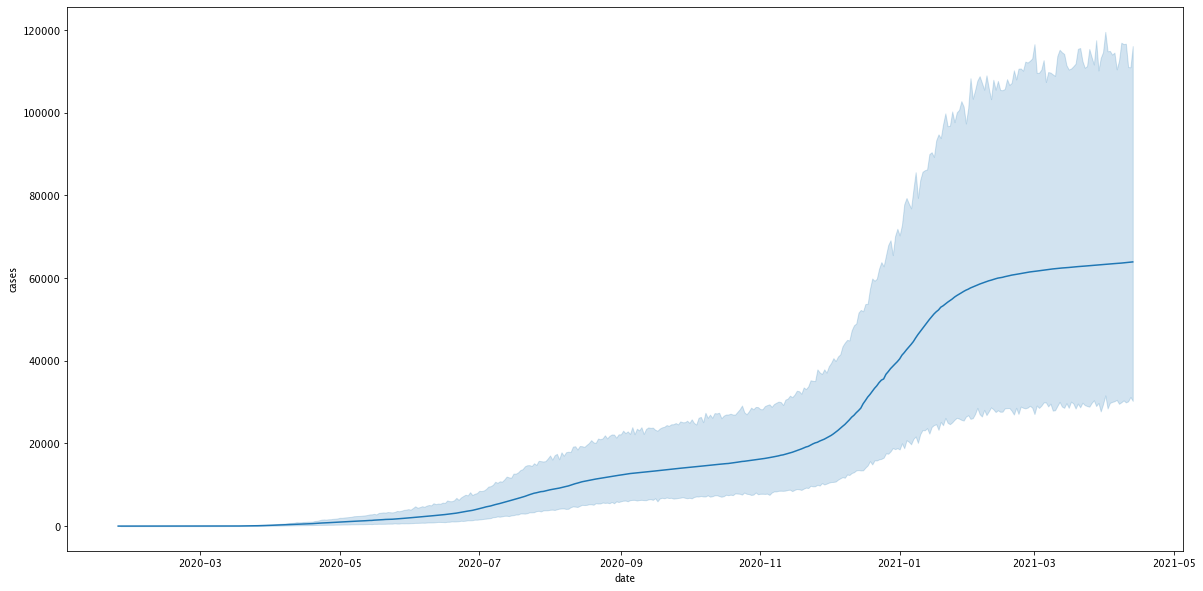

In [96]:
# average infection by state time-series(by date)
# variation or standard deviation by count compared to average of the each state

infection_by_county = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
infection_by_county['date'] = pd.to_datetime(infection_by_county['date'], format='%Y-%m-%d', errors='raise')

population_by_county = pd.read_csv('./population_by_county.csv')[['GEO_NAME', 'GEO_PARENT_NAME', 'B01001_001E']]
population_by_county = population_by_county.rename(columns={'GEO_NAME': 'county_tmp',
                                                          'GEO_PARENT_NAME': 'state',
                                                          'B01001_001E': 'population'})

def dropCounty(whole_county_name):
    if " County" in whole_county_name:
        return whole_county_name.replace(" County", "")
    return whole_county_name

population_by_county['county'] = dropCounty(population_by_county['county_tmp'])
infection_by_county = pd.merge(infection_by_county, population_by_county, how="left", on=["state", "county"])

infection_by_county.eval('cases_pct = cases / population', inplace=True)
infection_by_county.eval('deaths_pct = deaths / population', inplace=True)

infection_by_county.info()
infection_by_county.head()

# variance ranking


# california
infection_by_county_ca = infection_by_county.query("state == 'California'")
plt.figure(figsize=(20,10))
sns.lineplot(data=infection_by_county_ca, x="date", y="cases")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 6003 non-null   datetime64[ns]
 1   state                                6003 non-null   object        
 2   total_vaccinations                   5733 non-null   float64       
 3   people_fully_vaccinated_per_hundred  5247 non-null   float64       
 4   total_vaccinations_per_hundred       5349 non-null   float64       
 5   people_fully_vaccinated              5541 non-null   float64       
 6   daily_vaccinations_per_million       5539 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 328.4+ KB


<AxesSubplot:xlabel='date', ylabel='people_fully_vaccinated_per_hundred'>

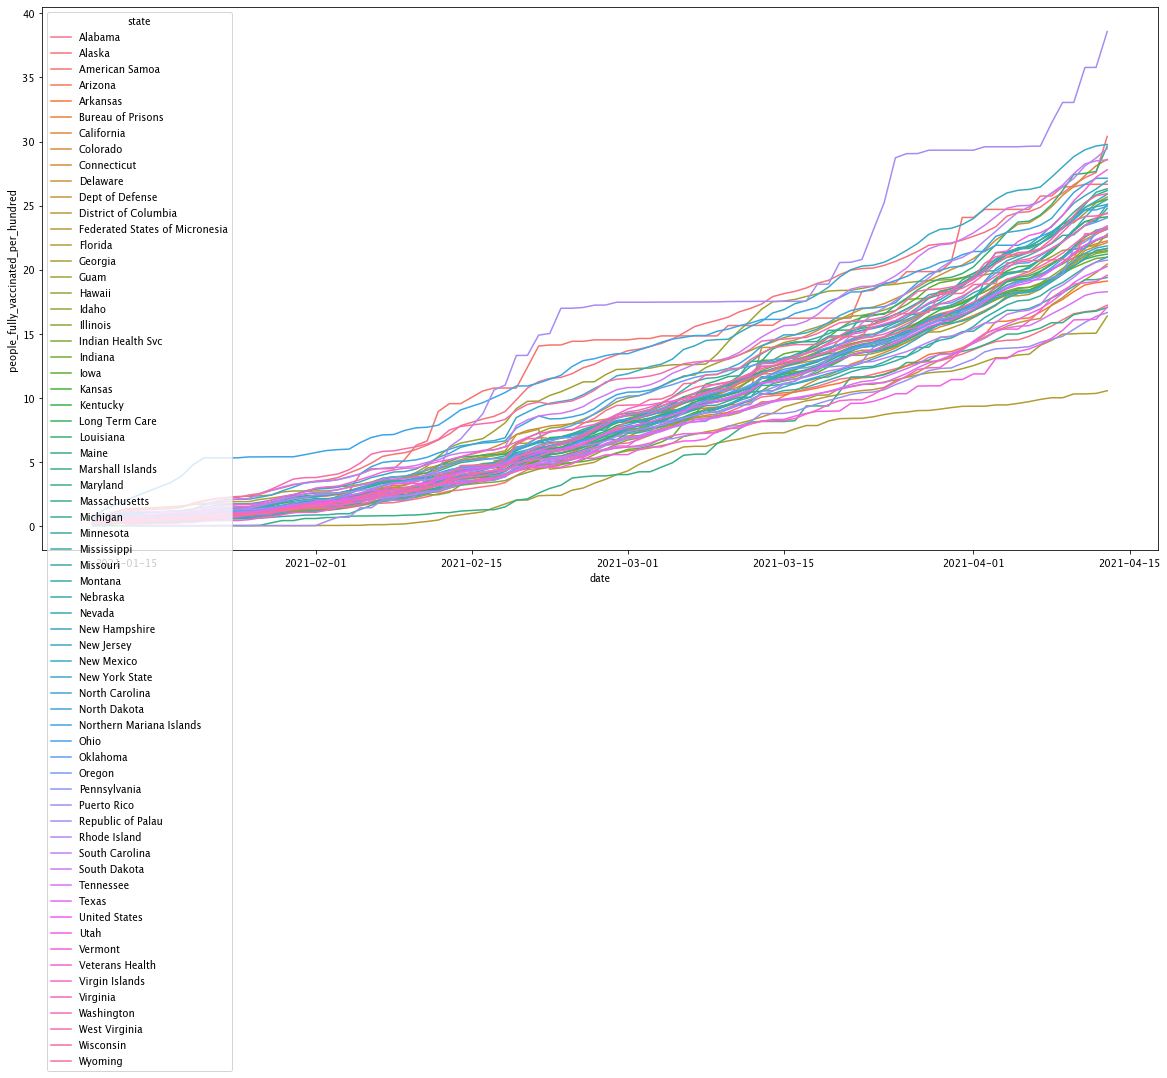

In [97]:
# infection - vaccination

vaccination_by_state = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
vaccination_by_state.drop(columns = ['total_distributed', 'people_vaccinated', 'people_vaccinated_per_hundred', 'daily_vaccinations_raw', 'daily_vaccinations', 'share_doses_used', 'distributed_per_hundred'],  inplace=True)
vaccination_by_state = vaccination_by_state.rename(columns={'location': 'state'})
vaccination_by_state['date'] = pd.to_datetime(vaccination_by_state['date'], format='%Y-%m-%d', errors='raise')
vaccination_by_state.info()
vaccination_by_state.head()

plt.figure(figsize=(20,10))
sns.lineplot(data=vaccination_by_state, x="date", y="people_fully_vaccinated_per_hundred", hue="state")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22399 entries, 0 to 22398
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 22399 non-null  datetime64[ns]
 1   state                                22399 non-null  object        
 2   fips                                 22399 non-null  int64         
 3   cases                                22399 non-null  int64         
 4   deaths                               22399 non-null  int64         
 5   population                           21226 non-null  float64       
 6   cases_pct                            21226 non-null  float64       
 7   deaths_pct                           21226 non-null  float64       
 8   total_vaccinations                   4752 non-null   float64       
 9   people_fully_vaccinated_per_hundred  4675 non-null   float64       
 10  total_vacc

<AxesSubplot:>

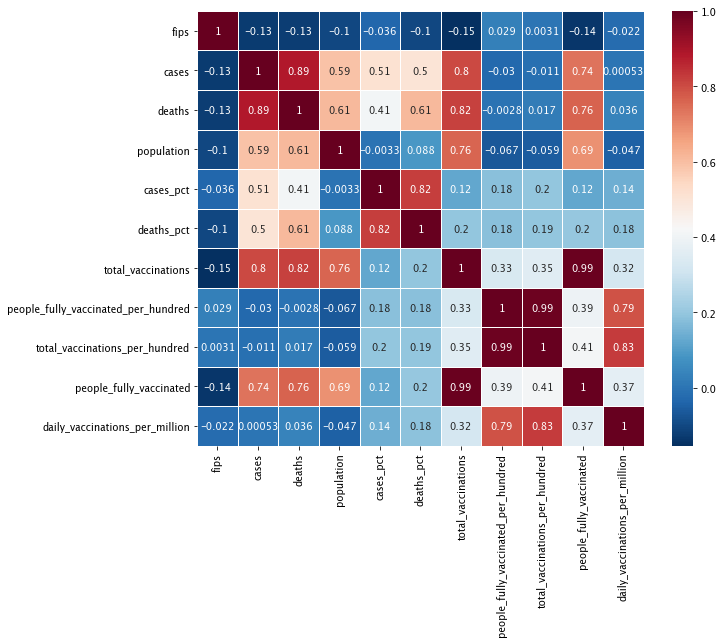

In [98]:
# aggregate infection - vaccination
_agg_iv = pd.merge(infection_by_state, vaccination_by_state, how="left", on=["date", "state"])

_agg_iv.info()
_agg_iv.head()

# calculate corr
pearsoncorr = _agg_iv.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

date                                           
2020-01-21  cases_pct                                   NaN
            deaths_pct                                  NaN
            people_fully_vaccinated_per_hundred         NaN
2020-01-22  cases_pct                                   NaN
            deaths_pct                                  NaN
                                                     ...   
2021-04-12  deaths_pct                             0.656135
            people_fully_vaccinated_per_hundred   -0.079873
2021-04-13  cases_pct                              1.000000
            deaths_pct                             0.657118
            people_fully_vaccinated_per_hundred   -0.108626
Name: cases_pct, Length: 1347, dtype: float64


<AxesSubplot:xlabel='date', ylabel='cases_corr'>

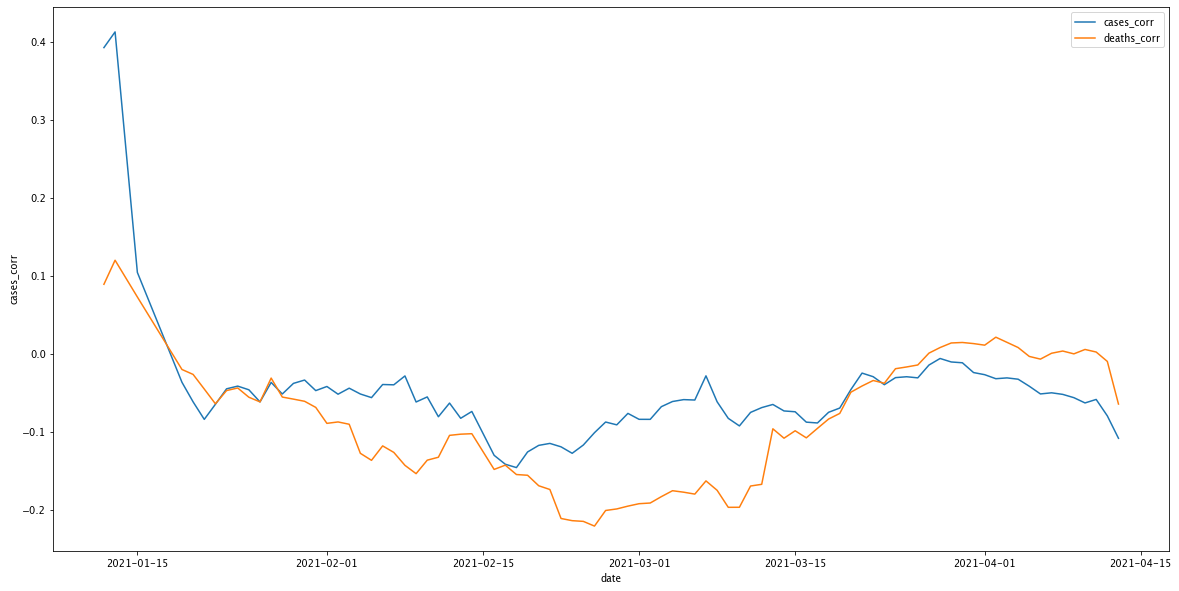

In [99]:
_agg_iv_simple = _agg_iv[['date','cases_pct', 'deaths_pct', 'people_fully_vaccinated_per_hundred']]

# calculate corr by date
pearsoncorr_by_date = _agg_iv_simple.groupby('date').corr(method='pearson')
print(pearsoncorr_by_date['cases_pct'])

# graph corr coff by date
date = []
cases_vacc_corr = []
deaths_vacc_corr = []
for cbd in pearsoncorr_by_date['cases_pct'].items():
    if cbd[1] == cbd[1]: # value exists
        if cbd[0][1] == 'people_fully_vaccinated_per_hundred':
            date.append(cbd[0][0])
            cases_vacc_corr.append(cbd[1])
for cbd in pearsoncorr_by_date['deaths_pct'].items():
    if cbd[1] == cbd[1]: # value exists
        if cbd[0][1] == 'people_fully_vaccinated_per_hundred':
            deaths_vacc_corr.append(cbd[1])

d = {'date': date, 'cases_corr': cases_vacc_corr, 'deaths_corr': deaths_vacc_corr}
plt.figure(figsize=(20,10))
sns.lineplot(data=d, x="date", y='cases_corr', legend='brief', label='cases_corr')
sns.lineplot(data=d, x="date", y='deaths_corr', legend='brief', label='deaths_corr')

In [100]:
# corr coff by state



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             5251 non-null   datetime64[ns]
 1   state            5251 non-null   object        
 2   B.1.1.7 Variant  5251 non-null   int64         
 3   P.1 Variant      5251 non-null   int64         
 4   B.1.351 Variant  5251 non-null   int64         
 5   variants_total   5251 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 246.3+ KB
           date                           state  B.1.1.7 Variant  P.1 Variant  \
978  2021-04-14                         Florida             3510          126   
2402 2021-04-14                        Michigan             2262            6   
2491 2021-04-14                       Minnesota             1573            5   
2046 2021-04-14                   Massachusetts             1100          1

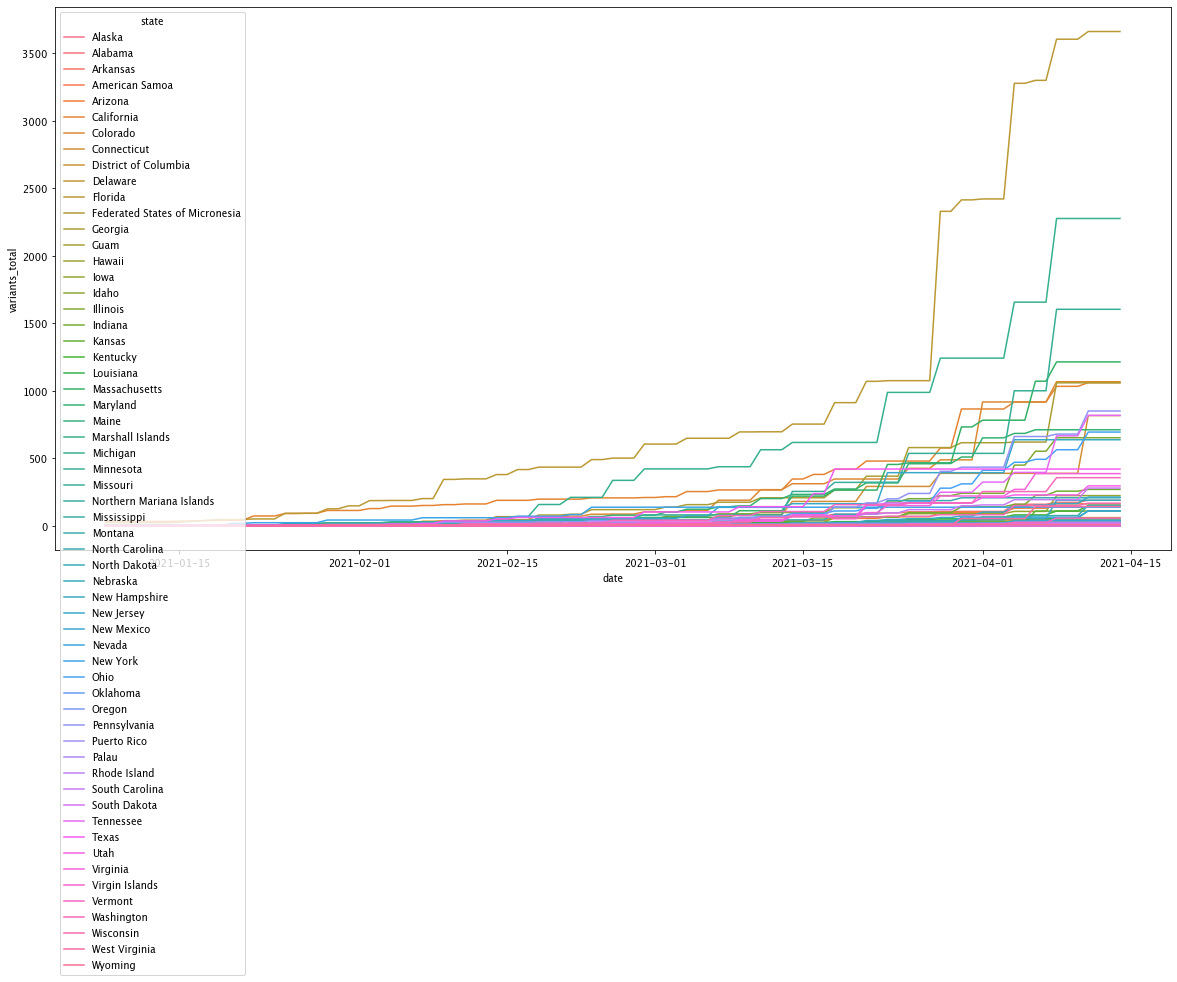

In [101]:
import json
import urllib.request

# variants
with urllib.request.urlopen('https://raw.githubusercontent.com/USATODAY/covid-variants/master/combined.json') as j:
    d = json.loads(j.read().decode())

variants_by_state = []
for dl1 in d:
    for dl2 in d[dl1]:
        variants_by_state.append(d[dl1][dl2])

variants_by_state  = pd.json_normalize(variants_by_state)
variants_by_state = variants_by_state.rename(columns = {
    'filedate': 'date',
    'State': 'state',
    'mytotal': 'variants_total'})
variants_by_state['date'] = pd.to_datetime(variants_by_state['date'], format='%Y-%m-%d', errors='raise')

STATE_LIST = [
    "Alabama", "Alaska", "American Samoa", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia",
    "Federated States of Micronesia", "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
    "Maine", "Maryland", "Marshall Islands", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana",
    "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Northern Mariana Islands",
    "Ohio", "Oklahoma", "Oregon", "Palau", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Minor Outlying Islands",
    "Virgin Islands", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
STATE_ABBRE_LIST = [
    "AL", "AK", "AS", "AZ", "AR", "CA", "CO", "CT", "DE", "DC",
    "FM", "FL", "GA", "GU", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA",
    "ME", "MD", "MH", "MA", "MI", "MN", "MS", "MO", "MT",
    "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "MP",
    "OH", "OK", "OR", "PW", "PA", "PR", "RI", "SC", "SD", "TN", "TX", "UM",
    "VI", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

STATE_DIC = dict(zip(STATE_ABBRE_LIST, STATE_LIST))

for s in STATE_DIC:
    variants_by_state['state'] = variants_by_state['state'].replace(s, STATE_DIC[s])

variants_by_state.info()
variants_by_state.head()

plt.figure(figsize=(20,10))
sns.lineplot(data=variants_by_state, x='date', y='variants_total', hue='state')

# state ranking by recent date
variants_by_state_recent = variants_by_state[variants_by_state['date'] == variants_by_state['date'].max()]
variants_by_state_recent = variants_by_state_recent.sort_values(by=['variants_total'], ascending=False)
print(variants_by_state_recent)

In [102]:
# correlation coefficient
_agg_iv = pd.merge(_agg_iv, variants_by_state, how="left", on=["date", "state"])

_agg_iv.info()
_agg_iv.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22399 entries, 0 to 22398
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 22399 non-null  datetime64[ns]
 1   state                                22399 non-null  object        
 2   fips                                 22399 non-null  int64         
 3   cases                                22399 non-null  int64         
 4   deaths                               22399 non-null  int64         
 5   population                           21226 non-null  float64       
 6   cases_pct                            21226 non-null  float64       
 7   deaths_pct                           21226 non-null  float64       
 8   total_vaccinations                   4752 non-null   float64       
 9   people_fully_vaccinated_per_hundred  4675 non-null   float64       
 10  total_vacc

,date,state,fips,cases,deaths,population,cases_pct,deaths_pct,total_vaccinations,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,daily_vaccinations_per_million,B.1.1.7 Variant,P.1 Variant,B.1.351 Variant,variants_total
0,2020-01-21,Washington,53,1,0,7294336.0,1.370927e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,Washington,53,1,0,7294336.0,1.370927e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,Washington,53,1,0,7294336.0,1.370927e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-24,Illinois,17,1,0,12821497.0,7.799401e-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,Washington,53,1,0,7294336.0,1.370927e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

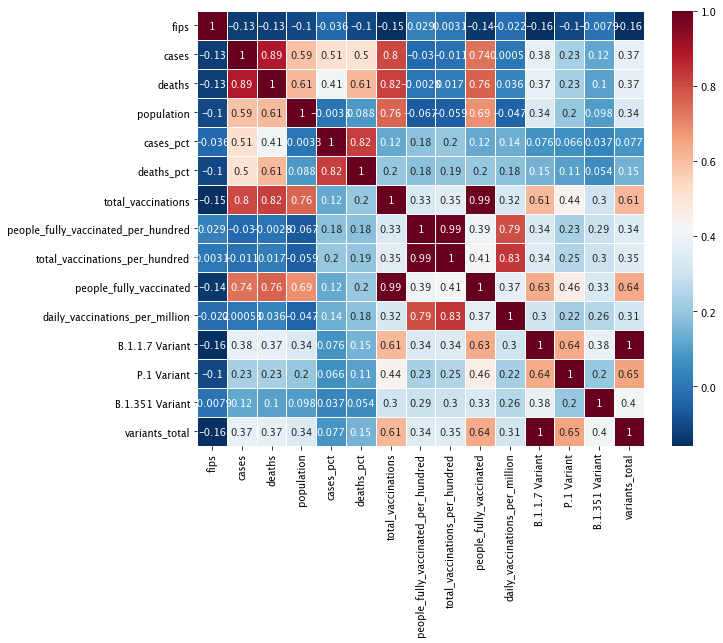

In [103]:
# calculate corr
pearsoncorr = _agg_iv.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

                                                cases_pct  deaths_pct  \
date                                                                    
2020-01-21 cases_pct                                  NaN         NaN   
           deaths_pct                                 NaN         NaN   
           people_fully_vaccinated_per_hundred        NaN         NaN   
           variants_total                             NaN         NaN   
2020-01-22 cases_pct                                  NaN         NaN   
...                                                   ...         ...   
2021-04-12 variants_total                        0.036910    0.133483   
2021-04-13 cases_pct                             1.000000    0.657118   
           deaths_pct                            0.657118    1.000000   
           people_fully_vaccinated_per_hundred  -0.108626   -0.064732   
           variants_total                        0.039597    0.134635   

                                                pe

<AxesSubplot:title={'center':'Correlation coeffient with fully vaccinated percentage'}, xlabel='date', ylabel='cases_corr'>

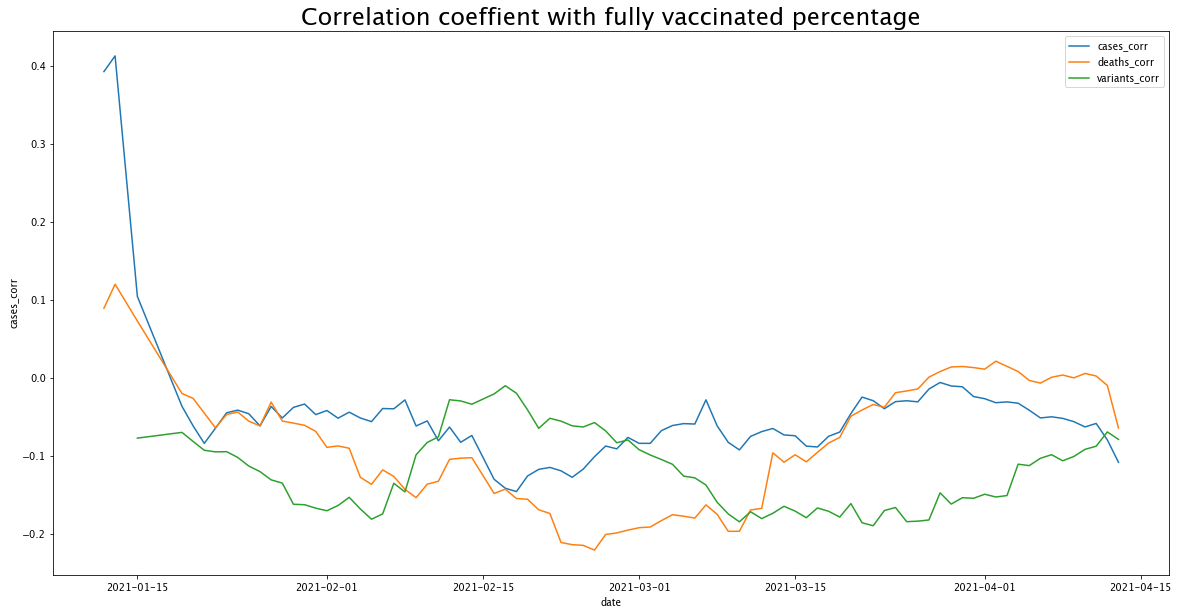

In [118]:
_agg_iv_simple = _agg_iv[['date','state','cases_pct', 'deaths_pct', 'people_fully_vaccinated_per_hundred', 'variants_total']]

# calculate corr by date
pearsoncorr_by_date = _agg_iv_simple.groupby('date').corr(method='pearson')

# graph corr coff by date
date = []
cases_vacc_corr = []
deaths_vacc_corr = []
variants_corr = []
for cbd in pearsoncorr_by_date['cases_pct'].items():
    if cbd[1] == cbd[1]: # value exists
        if cbd[0][1] == 'people_fully_vaccinated_per_hundred':
            date.append(cbd[0][0])
            cases_vacc_corr.append(cbd[1])
for cbd in pearsoncorr_by_date['deaths_pct'].items():
    if cbd[1] == cbd[1]: # value exists
        if cbd[0][1] == 'people_fully_vaccinated_per_hundred':
            deaths_vacc_corr.append(cbd[1])
for cbd in pearsoncorr_by_date['variants_total'].items():
    if cbd[1] == cbd[1]: # value exists
        if cbd[0][1] == 'people_fully_vaccinated_per_hundred':
            variants_corr.append(cbd[1])            

if len(variants_corr) < len(cases_vacc_corr):
    variants_corr = [None] * (len(cases_vacc_corr)-len(variants_corr)) + variants_corr

d = {'date': date, 'cases_corr': cases_vacc_corr, 'deaths_corr': deaths_vacc_corr, 'variants_corr': variants_corr}
plt.figure(figsize=(20,10))
plt.title( "Correlation coeffient with fully vaccinated percentage" , size = 24 )
sns.lineplot(data=d, x="date", y='cases_corr', legend='brief', label='cases_corr')
sns.lineplot(data=d, x="date", y='deaths_corr', legend='brief', label='deaths_corr')
sns.lineplot(data=d, x="date", y='variants_corr', legend='brief', label='variants_corr')

In [120]:
# clean data and export
_agg_iv_simple.to_csv('_agg_simple_by_state.csv', index=False)